#### Matrix Multiplication @ vs np.dot
- @ runs faster


In [32]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression



In [157]:
# model = LinearRegression()


In [158]:
rows = 100

x = np.random.randn(rows, 1) + 5
# x = x[:, np.newaxis]

y = 2*x - np.random.randn(rows, 1)

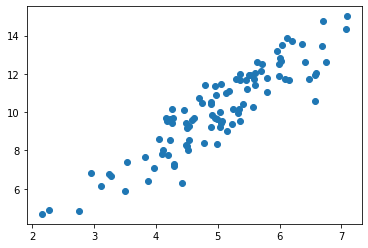

In [159]:
plt.scatter(x, y);

In [168]:
def plot_data(x, y, theta0, theta1):
    plt.figure()
    
    # Plot real data
    plt.scatter(x, y);
    
    # Plot line of best fit
    xmin, xmax = min(x), max(x)
    psuedo_x = np.linspace(xmin, xmax, 13, 20)
    psuedo_y = [(theta0 + theta1*i) for i in psuedo_x]
    plt.plot(psuedo_x, psuedo_y, color='orange')
    

#### Line of best fit
```
Lets find a solution by trail and error. We expect optimal solution to be roughly close to this solution.
```

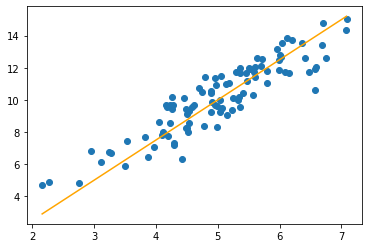

In [169]:
theta0, theta1 = -2.5, 2.5
plot_data(x, y, theta0, theta1)

In [170]:
alpha = 0.01
steps = 100

m = len(x)
total_error = 0

In [171]:
def gradient_descent(x, y, alpha, steps):
    
    theta0, theta1 = 0, 0
    m = len(x)
    for _ in range(steps):
        
        def cost_function_theta0(theta0, theta1):
            total = 0
            for xi, yi in zip(x, y):
                y_pred = theta0 + (theta1 * xi)
                summation = y_pred - yi
#                 print(xi, yi, 'hypothesis:', hypothesis, 'summation:', summation, sep=',')
                total += summation
            return total

        def cost_function_theta1(theta0, theta1):
            total = 0
            for xi, yi in zip(x, y):
                y_pred = theta0 + (theta1 * xi)
                summation = (y_pred - yi) * xi
#                 print(xi, yi, 'hypothesis:', hypothesis, 'summation:', summation, sep=',')
                total += summation
            return total
    
        tmp0 = theta0 - ((alpha/m) * cost_function_theta0(theta0, theta1))
        tmp1 = theta1 - ((alpha/m) * cost_function_theta1(theta0, theta1))
        
        theta0 = tmp0
        theta1 = tmp1

    
    return theta0, theta1

In [172]:
theta0, theta1 = gradient_descent(x=x, y=y, alpha=0.01, steps=1000)

print('Intercept:', theta0, '\r\n', 'gradient:', theta1)

Intercept: [0.25501999] 
 gradient: [1.97407431]


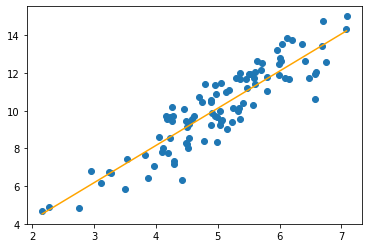

In [173]:
plot_data(x, y, theta0, theta1)

### Vectorised implementation of Linear Regression

In [223]:
def _gradient_descent_step(x, y, theta, alpha_m):
    y_pred = x @ theta # dimensions: [m * (n+1)] @ [(n+1) * 1]
    error = y_pred - y # dimensions: [m * 1] - [m * 1]
    derivative = x.T @ error # dimensions: [(n+1) * m] @ [m * 1]
    theta = theta - (alpha_m * derivative)
    return theta
    
    
def _compute_cost(x, y, theta, alpha_m):
    return (1/(2*m)) * (((x @ theta) - y) ** 2).sum()
    
    
def gradient_descent_vectorised(x, y, alpha, steps=100):
    """
    Params:
        x (array): (m, n) array where m, n > 0
        y (array): (m, 1) array where m > 0
        alpha (float): Learning rate
        steps (int): No. of steps for gradient descent algorithm
        
    """
    # theta is [(n+1) * 1] column vector, with 0's as initial values
    n_features = x.shape[1]
    theta = np.zeros((n_features + 1, 1))
    
    # add a column of 1's to x (intercept)
    x_ones = np.ones((x.shape[0], 1))
    x = np.append(x_ones, x, axis=1)
    
    m = len(x)
    alpha_m = alpha/m
    
#     errors = 
    for i in range(steps):
        theta = _gradient_descent_step(x, y, theta, alpha_m)
        cost_function = (1/(2*m)) * (((x @ theta) - y) ** 2).sum()
        print(cost_function)
#         theta0 = tmp0
#         theta1 = tmp1
    
#     return theta0, theta1

In [224]:
gradient_descent_vectorised(x=x, y=y, alpha=0.01, steps=10)

28.891473054534508
15.545676201518372
8.463031025249858
4.704254426371528
2.70946230242865
1.6508206779788228
1.0889962142061937
0.7908337274374404
0.6325972412033501
0.5486197965642428


In [215]:
theta0, theta1 = gradient_descent_vectorised(x=x, y=y, alpha=0.01, steps=1000)

print('Intercept:', theta0, '\r\n', 'gradient:', theta1)

28.891473054534508
15.545676201518372
8.463031025249858
4.704254426371528
2.70946230242865
1.6508206779788228
1.0889962142061937
0.7908337274374404
0.6325972412033501
0.5486197965642428
0.504051791816034
0.4803984655359194
0.46784460654874693
0.4611812603719329
0.4576440232325983
0.4557658198766958
0.45476807019126475
0.45423757997170905
0.45395506613068565
0.453804154643664
0.4537230855554808
0.45367908271950663
0.4536547517610044
0.45364086144591936
0.4536325127371796
0.45362710570432485
0.45362326055790547
0.4536202450400305
0.4536176705392542
0.45361533081806527
0.4536131164252084
0.45361096927410993
0.453608858537548
0.45360676785490045
0.4536046885430013
0.4536026159931293
0.45360054775888026
0.45359848254139556
0.4535964196508238
0.45359435872051507
0.45359229955534225
0.45359024205120774
0.45358818615232355
0.45358613182853935
0.4535840790633122
0.4535820278473205
0.45357997817507545
0.4535779300431227
0.4535758834490883
0.4535738383911717
0.45357179486787735
0.4535697528778718

TypeError: cannot unpack non-iterable NoneType object

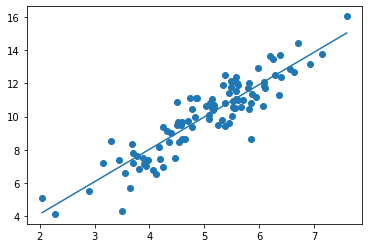

In [119]:
plot_data(x, y, theta0, theta1)

In [ ]:
x = [1, 2, 2, 1]
y = [1, 2.5, 4, 3]

t0, t1 = 1, 1
a = 0.0001
m = len(x)

a_m = a/m

In [ ]:
gradient_descent_vectorised(x, y, t0, t1, a, 100)

In [ ]:
gradient_descent(x, y, t0, t1, a, 7)

In [ ]:
h = lambda t0, t1, xi: t0 + (t1*xi)

In [ ]:
# epsilon entity

fp = './machine-learning-ex1/ex1/ex1data1.txt'
data1 = pd.read_csv(fp, header=None)

x, y = data1[0].to_numpy()[:, np.newaxis], data1[1].to_numpy()[:, np.newaxis]

x = np.append(np.ones((x.shape[0], 1)), x, axis=1)

alpha = 0.01
m = len(y)
theta = np.zeros((2, 1))

a_m = alpha/m


In [ ]:
x.shape, theta.shape

In [24]:
error = y_pred - y

NameError: name 'y_pred' is not defined

In [ ]:
cost = np.dot(x.T, error)[0][0]/m

In [ ]:
theta - (alpha * cost)

In [ ]:
theta = 0
for _ in range(5):
    y_pred = x * theta
    error = y_pred - y
    cost_derivative = np.dot(x.T, error)[0][0]/m
    cost = np.dot(x.T, error)[0][0]/(2*m)
    theta = theta - (alpha * cost_derivative)
    print(cost, theta)


In [200]:
a = LinearRegression()

In [201]:
a.fit?

In [124]:
np.append(np.ones((2, 1)), np.zeros((2, 1)), axis=1)

array([[1., 0.],
       [1., 0.]])

In [ ]:
def cost_function(x, y, theta):
    """
    We are trying to minimise the cost function. The value of cost function
    should always decrease with each step of gradient descent.

    """
    
    m = y.shape[0]
    return (1/(2*m)) * ((np.dot(x, theta) - y) ** 2).sum()



for _ in range(10):
    cf = cost_function(x, y, theta)
#     print(cf)

    theta

    cf0 = ((np.dot(x, theta) - y) ** 2).sum()
    tmp0 = theta0 - (a_m * cf0)
    print('cf0', cf0)
    print('tmp0', tmp0, theta0)

    y_predicted = np.dot(x, theta)
    cf1 =  np.dot(x[np.newaxis, :], ( (y_predicted - y) ** 2))
    tmp1 = theta1 - (a_m * cf1)
    print('cf1', cf1)
    print('tmp1', tmp1, theta1)
    
    theta = np.array([tmp0, tmp1])

    print(theta)
    print('***')


In [ ]:
# Plot data
plt.scatter(x, y)